In [636]:
# Importamos las librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
layers = tf.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [637]:
# Importamos la data cancer.csv

data = pd.read_csv("/Users/cspoerer/Desktop/Escritorio - Carlos’s MacBook Air/Estados Personales/MDS/Deep Learning/deepLearning_intro_course-main/cancer.csv")
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [638]:
# Vemos la información de columnas y su formato

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [639]:
# Eliminamos las columnas que no servirán para el modelo

data.drop("Unnamed: 32", axis=1,inplace=True)
data.drop("id", axis=1,inplace=True)

In [640]:
# Identificamos las variables dependientes e independientes. La variable Independiente es "diagnosis" con valores categóricos "M" y "B"

prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data[prediction_var].values
Y = data["diagnosis"].values

In [641]:
Y[0:30]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M'], dtype=object)

In [642]:
# Transformamos las variables en 1 y 0 

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [643]:
# Realizamos la arquitectura de nuestra red neuronal. Para efecto de comparaciones de las distintas iteraciones por
# combinación NO CONSIDERAREMOS EarlyStopping

#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import time

# El análisis se basarán en 16 combinaciones: 8 con una capa y 8 con dos capas. Las combinaciones serán tomando en consideración
# el cambio de Batch size, Número de Neuronas por capa y Learning Rate.

b_size = [10, 250]
Num_neu = [4,8]
lr_test = [0.0001, 0.01]

#early_stopping_monitor =  EarlyStopping(patience=2) #Para con 2 valores "loss" iguales

# Creamos dos DataFrames, dt_2 almacenará los valores de nuestra red reuronal de dos capas y dt_1 el de una capa

dt_2 = pd.DataFrame(columns = ["Batch_Size", "Neuronas", "Tasa_W", "Iter", "val_loss","val_accur", "train_loss", "train_accur"])
dt_1 = pd.DataFrame(columns = ["Batch_Size", "Neuronas", "Tasa_W", "Iter", "val_loss","val_accur", "train_loss", "train_accur"])

# Iteramos las combinaciones, cada una se iterará el mismo número de Epochs (10)
# Esta iteración rellenará el DataFrame de dos capas y el objetivo será la comparación de la métrica Accuracy (Validation vs Train) 
# y la función Loss

# El entrenamiento será con el 80% de la Data, el 20% restante lo utilizaremos para la validación.

start2_capas = time.time()
for bt in b_size:
    for n in Num_neu:
        for r in lr_test:  
            for i in range(0,11):
                model = Sequential()
                model.add(Dense(n, input_dim=30, kernel_initializer='normal', activation='relu'))
                model.add(Dense(n, input_dim=30, kernel_initializer='normal', activation='relu'))
                model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
                my_optimizer = SGD(learning_rate=r)
                model.compile(optimizer = my_optimizer,loss = 'binary_crossentropy', metrics=['accuracy'])
                #historia = model.fit(X, encoded_Y, batch_size=bt, epochs=10, verbose=0, validation_split=0.2, callbacks = [early_stopping_monitor])
                historia = model.fit(X, encoded_Y, batch_size=bt, epochs=10, verbose=0, validation_split=0.2)
                dt2=pd.DataFrame(columns = ["Batch_Size", "Neuronas", "Tasa_W", "Iter", "val_loss","val_accur", "train_loss", "train_accur"])
                dt2.at[0,"Batch_Size"]=bt
                dt2.at[0,"Neuronas"]=n
                dt2.at[0,"Tasa_W"]=r
                dt2.at[0,"Iter"]=i
                dt2.at[0,"val_loss"]=historia.history["val_loss"]
                dt2.at[0,"val_accur"]=historia.history["val_accuracy"]
                dt2.at[0,"train_loss"]=historia.history["loss"]
                dt2.at[0,"train_accur"]=historia.history["accuracy"]
                dt_2 = pd.concat([dt_2,dt2], ignore_index=True)       

end2_capas = time.time()
print(end2_capas - start2_capas)

# Esta iteración rellenará el DataFrame de una capas

start1_capas = time.time()
for bt in b_size:
    for n in Num_neu:
        for r in lr_test:
            for i in range(0,11):
                model = Sequential()
                model.add(Dense(n, input_dim=30, kernel_initializer='normal', activation='relu'))
                model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
                my_optimizer = SGD(learning_rate=r)
                model.compile(optimizer = my_optimizer,loss = 'binary_crossentropy', metrics=['accuracy'])
                #historia1 = model.fit(X, encoded_Y, batch_size=bt, epochs=10, verbose=0, validation_split=0.2, callbacks = [early_stopping_monitor])
                historia1 = model.fit(X, encoded_Y, batch_size=bt, epochs=10, verbose=0, validation_split=0.2)
                dt3=pd.DataFrame(columns = ["Batch_Size", "Neuronas", "Tasa_W", "Iter", "val_loss","val_accur", "train_loss", "train_accur"])
                dt3.at[0,"Batch_Size"]=bt
                dt3.at[0,"Neuronas"]=n
                dt3.at[0,"Tasa_W"]=r
                dt3.at[0,"Iter"]=i
                dt3.at[0,"val_loss"]=historia1.history["val_loss"]
                dt3.at[0,"val_accur"]=historia1.history["val_accuracy"]
                dt3.at[0,"train_loss"]=historia1.history["loss"]
                dt3.at[0,"train_accur"]=historia1.history["accuracy"]
                dt_1 = pd.concat([dt_1,dt3], ignore_index=True)

end1_capas = time.time()
print(end1_capas - start1_capas)

139.0866551399231
134.8477520942688


In [666]:
# Tiempos de las distintas combinaciones. Nos quedaremos con la última.

print("primera iteración: ",(301.8722131252289+287.72921323776245)/60)
print("segunda iteración: ",(248.3890962600708+285.5837152004242)/60)
print("tercera iteración: ",(381.3814549446106+366.5700132846832)/60)
print("cuarta iteración: ",(434.6023690700531+432.54000997543335)/60)
print("quinta iteración: ",(163.9073679447174+134.84529209136963)/60)
print("quinta iteración: ",(151.7928991317749+132.17699885368347)/60)
print("sexta iteración: ",(122.31897497177124+125.44026112556458)/60)
print("septima iteración: ",(141.04151511192322+127.00703692436218)/60)
print("octava iteración: ",(215.85295629501343+155.01118206977844)/60)
print("novena iteración: ",(139.0866551399231+134.8477520942688)/60)

primera iteración:  9.826690439383189
segunda iteración:  8.899546857674917
tercera iteración:  12.465857803821564
cuarta iteración:  14.452372984091442
quinta iteración:  4.979211000601451
quinta iteración:  4.7328316330909725
sexta iteración:  4.129320601622264
septima iteración:  4.467475867271423
octava iteración:  6.181068972746531
novena iteración:  4.565573453903198


In [645]:
# Vemos la información del DataFrame de dos capas

dt_2.head(2)

,Batch_Size,Neuronas,Tasa_W,Iter,val_loss,val_accur,train_loss,train_accur
0,10,4,0.0001,0,"[0.6926887035369873, 0.6940847635269165, 0.695...","[0.7719298005104065, 0.22807016968727112, 0.22...","[0.6995576620101929, 0.6944670677185059, 0.690...","[0.591208815574646, 0.4769230782985687, 0.4087..."
1,10,4,0.0001,1,"[0.7167455554008484, 0.7183013558387756, 0.719...","[0.22807016968727112, 0.22807016968727112, 0.2...","[0.6690688133239746, 0.6683900952339172, 0.667...","[0.4087912142276764, 0.4087912142276764, 0.408..."


In [646]:
#Creamos las columnas Validation/Train Loss y Validation/Train Accuracy

dt_1["Epoch1_val_loss"]=""
dt_1["Epoch2_val_loss"]=""
dt_1["Epoch3_val_loss"]=""
dt_1["Epoch4_val_loss"]=""
dt_1["Epoch5_val_loss"]=""
dt_1["Epoch6_val_loss"]=""
dt_1["Epoch7_val_loss"]=""
dt_1["Epoch8_val_loss"]=""
dt_1["Epoch9_val_loss"]=""
dt_1["Epoch10_val_loss"]=""

dt_1["Epoch1_train_loss"]=""
dt_1["Epoch2_train_loss"]=""
dt_1["Epoch3_train_loss"]=""
dt_1["Epoch4_train_loss"]=""
dt_1["Epoch5_train_loss"]=""
dt_1["Epoch6_train_loss"]=""
dt_1["Epoch7_train_loss"]=""
dt_1["Epoch8_train_loss"]=""
dt_1["Epoch9_train_loss"]=""
dt_1["Epoch10_train_loss"]=""

dt_1["Epoch1_val_acur"]=""
dt_1["Epoch2_val_acur"]=""
dt_1["Epoch3_val_acur"]=""
dt_1["Epoch4_val_acur"]=""
dt_1["Epoch5_val_acur"]=""
dt_1["Epoch6_val_acur"]=""
dt_1["Epoch7_val_acur"]=""
dt_1["Epoch8_val_acur"]=""
dt_1["Epoch9_val_acur"]=""
dt_1["Epoch10_val_acur"]=""

dt_1["Epoch1_train_acur"]=""
dt_1["Epoch2_train_acur"]=""
dt_1["Epoch3_train_acur"]=""
dt_1["Epoch4_train_acur"]=""
dt_1["Epoch5_train_acur"]=""
dt_1["Epoch6_train_acur"]=""
dt_1["Epoch7_train_acur"]=""
dt_1["Epoch8_train_acur"]=""
dt_1["Epoch9_train_acur"]=""
dt_1["Epoch10_train_acur"]=""


dt_2["Epoch1_val_loss"]=""
dt_2["Epoch2_val_loss"]=""
dt_2["Epoch3_val_loss"]=""
dt_2["Epoch4_val_loss"]=""
dt_2["Epoch5_val_loss"]=""
dt_2["Epoch6_val_loss"]=""
dt_2["Epoch7_val_loss"]=""
dt_2["Epoch8_val_loss"]=""
dt_2["Epoch9_val_loss"]=""
dt_2["Epoch10_val_loss"]=""

dt_2["Epoch1_train_loss"]=""
dt_2["Epoch2_train_loss"]=""
dt_2["Epoch3_train_loss"]=""
dt_2["Epoch4_train_loss"]=""
dt_2["Epoch5_train_loss"]=""
dt_2["Epoch6_train_loss"]=""
dt_2["Epoch7_train_loss"]=""
dt_2["Epoch8_train_loss"]=""
dt_2["Epoch9_train_loss"]=""
dt_2["Epoch10_train_loss"]=""


dt_2["Epoch1_val_acur"]=""
dt_2["Epoch2_val_acur"]=""
dt_2["Epoch3_val_acur"]=""
dt_2["Epoch4_val_acur"]=""
dt_2["Epoch5_val_acur"]=""
dt_2["Epoch6_val_acur"]=""
dt_2["Epoch7_val_acur"]=""
dt_2["Epoch8_val_acur"]=""
dt_2["Epoch9_val_acur"]=""
dt_2["Epoch10_val_acur"]=""

dt_2["Epoch1_train_acur"]=""
dt_2["Epoch2_train_acur"]=""
dt_2["Epoch3_train_acur"]=""
dt_2["Epoch4_train_acur"]=""
dt_2["Epoch5_train_acur"]=""
dt_2["Epoch6_train_acur"]=""
dt_2["Epoch7_train_acur"]=""
dt_2["Epoch8_train_acur"]=""
dt_2["Epoch9_train_acur"]=""
dt_2["Epoch10_train_acur"]=""




In [647]:
dt_1.head(2)

,Batch_Size,Neuronas,Tasa_W,Iter,val_loss,val_accur,train_loss,train_accur,Epoch1_val_loss,Epoch2_val_loss,...,Epoch1_train_acur,Epoch2_train_acur,Epoch3_train_acur,Epoch4_train_acur,Epoch5_train_acur,Epoch6_train_acur,Epoch7_train_acur,Epoch8_train_acur,Epoch9_train_acur,Epoch10_train_acur
0,10,4,0.0001,0,"[0.6298519372940063, 0.5301826596260071, 0.548...","[0.7456140518188477, 0.8947368264198303, 0.929...","[0.6091902852058411, 0.6111966371536255, 0.604...","[0.687912106513977, 0.7714285850524902, 0.8263...",,,...,,,,,,,,,,
1,10,4,0.0001,1,"[0.6927559971809387, 0.6928778290748596, 0.692...","[0.780701756477356, 0.7719298005104065, 0.7719...","[0.6944910287857056, 0.6927458047866821, 0.692...","[0.6087912321090698, 0.6285714507102966, 0.639...",,,...,,,,,,,,,,


In [648]:
dt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Batch_Size          88 non-null     object
 1   Neuronas            88 non-null     object
 2   Tasa_W              88 non-null     object
 3   Iter                88 non-null     object
 4   val_loss            88 non-null     object
 5   val_accur           88 non-null     object
 6   train_loss          88 non-null     object
 7   train_accur         88 non-null     object
 8   Epoch1_val_loss     88 non-null     object
 9   Epoch2_val_loss     88 non-null     object
 10  Epoch3_val_loss     88 non-null     object
 11  Epoch4_val_loss     88 non-null     object
 12  Epoch5_val_loss     88 non-null     object
 13  Epoch6_val_loss     88 non-null     object
 14  Epoch7_val_loss     88 non-null     object
 15  Epoch8_val_loss     88 non-null     object
 16  Epoch9_val_loss     88 non-n

In [649]:
# Ordenamos e Imputamos los valors de Loss y Accuracy a las nuevas celdas

for i in range(len(dt_1)):
        dt_1["Epoch1_val_loss"][i]=dt_1["val_loss"][i][0]
        dt_1["Epoch2_val_loss"][i]=dt_1["val_loss"][i][1]
        dt_1["Epoch3_val_loss"][i]=dt_1["val_loss"][i][2]
        dt_1["Epoch4_val_loss"][i]=dt_1["val_loss"][i][3]
        dt_1["Epoch5_val_loss"][i]=dt_1["val_loss"][i][4]
        dt_1["Epoch6_val_loss"][i]=dt_1["val_loss"][i][5]
        dt_1["Epoch7_val_loss"][i]=dt_1["val_loss"][i][6]
        dt_1["Epoch8_val_loss"][i]=dt_1["val_loss"][i][7]
        dt_1["Epoch9_val_loss"][i]=dt_1["val_loss"][i][8]
        dt_1["Epoch10_val_loss"][i]=dt_1["val_loss"][i][9]
        
        dt_1["Epoch1_train_loss"][i]=dt_1["train_loss"][i][0]
        dt_1["Epoch2_train_loss"][i]=dt_1["train_loss"][i][1]
        dt_1["Epoch3_train_loss"][i]=dt_1["train_loss"][i][2]
        dt_1["Epoch4_train_loss"][i]=dt_1["train_loss"][i][3]
        dt_1["Epoch5_train_loss"][i]=dt_1["train_loss"][i][4]
        dt_1["Epoch6_train_loss"][i]=dt_1["train_loss"][i][5]
        dt_1["Epoch7_train_loss"][i]=dt_1["train_loss"][i][6]
        dt_1["Epoch8_train_loss"][i]=dt_1["train_loss"][i][7]
        dt_1["Epoch9_train_loss"][i]=dt_1["train_loss"][i][8]
        dt_1["Epoch10_train_loss"][i]=dt_1["train_loss"][i][9]
        
        dt_1["Epoch1_val_acur"][i]=dt_1["val_accur"][i][0]
        dt_1["Epoch2_val_acur"][i]=dt_1["val_accur"][i][1]
        dt_1["Epoch3_val_acur"][i]=dt_1["val_accur"][i][2]
        dt_1["Epoch4_val_acur"][i]=dt_1["val_accur"][i][3]
        dt_1["Epoch5_val_acur"][i]=dt_1["val_accur"][i][4]
        dt_1["Epoch6_val_acur"][i]=dt_1["val_accur"][i][5]
        dt_1["Epoch7_val_acur"][i]=dt_1["val_accur"][i][6]
        dt_1["Epoch8_val_acur"][i]=dt_1["val_accur"][i][7]
        dt_1["Epoch9_val_acur"][i]=dt_1["val_accur"][i][8]
        dt_1["Epoch10_val_acur"][i]=dt_1["val_accur"][i][9]
        
        dt_1["Epoch1_train_acur"][i]=dt_1["train_accur"][i][0]
        dt_1["Epoch2_train_acur"][i]=dt_1["train_accur"][i][1]
        dt_1["Epoch3_train_acur"][i]=dt_1["train_accur"][i][2]
        dt_1["Epoch4_train_acur"][i]=dt_1["train_accur"][i][3]
        dt_1["Epoch5_train_acur"][i]=dt_1["train_accur"][i][4]
        dt_1["Epoch6_train_acur"][i]=dt_1["train_accur"][i][5]
        dt_1["Epoch7_train_acur"][i]=dt_1["train_accur"][i][6]
        dt_1["Epoch8_train_acur"][i]=dt_1["train_accur"][i][7]
        dt_1["Epoch9_train_acur"][i]=dt_1["train_accur"][i][8]
        dt_1["Epoch10_train_acur"][i]=dt_1["train_accur"][i][9]
        
        dt_2["Epoch1_val_loss"][i]=dt_2["val_loss"][i][0]
        dt_2["Epoch2_val_loss"][i]=dt_2["val_loss"][i][1]
        dt_2["Epoch3_val_loss"][i]=dt_2["val_loss"][i][2]
        dt_2["Epoch4_val_loss"][i]=dt_2["val_loss"][i][3]
        dt_2["Epoch5_val_loss"][i]=dt_2["val_loss"][i][4]
        dt_2["Epoch6_val_loss"][i]=dt_2["val_loss"][i][5]
        dt_2["Epoch7_val_loss"][i]=dt_2["val_loss"][i][6]
        dt_2["Epoch8_val_loss"][i]=dt_2["val_loss"][i][7]
        dt_2["Epoch9_val_loss"][i]=dt_2["val_loss"][i][8]
        dt_2["Epoch10_val_loss"][i]=dt_2["val_loss"][i][9]
        
        dt_2["Epoch1_train_loss"][i]=dt_2["train_loss"][i][0]
        dt_2["Epoch2_train_loss"][i]=dt_2["train_loss"][i][1]
        dt_2["Epoch3_train_loss"][i]=dt_2["train_loss"][i][2]
        dt_2["Epoch4_train_loss"][i]=dt_2["train_loss"][i][3]
        dt_2["Epoch5_train_loss"][i]=dt_2["train_loss"][i][4]
        dt_2["Epoch6_train_loss"][i]=dt_2["train_loss"][i][5]
        dt_2["Epoch7_train_loss"][i]=dt_2["train_loss"][i][6]
        dt_2["Epoch8_train_loss"][i]=dt_2["train_loss"][i][7]
        dt_2["Epoch9_train_loss"][i]=dt_2["train_loss"][i][8]
        dt_2["Epoch10_train_loss"][i]=dt_2["train_loss"][i][9]
        
        dt_2["Epoch1_val_acur"][i]=dt_2["val_accur"][i][0]
        dt_2["Epoch2_val_acur"][i]=dt_2["val_accur"][i][1]
        dt_2["Epoch3_val_acur"][i]=dt_2["val_accur"][i][2]
        dt_2["Epoch4_val_acur"][i]=dt_2["val_accur"][i][3]
        dt_2["Epoch5_val_acur"][i]=dt_2["val_accur"][i][4]
        dt_2["Epoch6_val_acur"][i]=dt_2["val_accur"][i][5]
        dt_2["Epoch7_val_acur"][i]=dt_2["val_accur"][i][6]
        dt_2["Epoch8_val_acur"][i]=dt_2["val_accur"][i][7]
        dt_2["Epoch9_val_acur"][i]=dt_2["val_accur"][i][8]
        dt_2["Epoch10_val_acur"][i]=dt_2["val_accur"][i][9]
        
        dt_2["Epoch1_train_acur"][i]=dt_2["train_accur"][i][0]
        dt_2["Epoch2_train_acur"][i]=dt_2["train_accur"][i][1]
        dt_2["Epoch3_train_acur"][i]=dt_2["train_accur"][i][2]
        dt_2["Epoch4_train_acur"][i]=dt_2["train_accur"][i][3]
        dt_2["Epoch5_train_acur"][i]=dt_2["train_accur"][i][4]
        dt_2["Epoch6_train_acur"][i]=dt_2["train_accur"][i][5]
        dt_2["Epoch7_train_acur"][i]=dt_2["train_accur"][i][6]
        dt_2["Epoch8_train_acur"][i]=dt_2["train_accur"][i][7]
        dt_2["Epoch9_train_acur"][i]=dt_2["train_accur"][i][8]
        dt_2["Epoch10_train_acur"][i]=dt_2["train_accur"][i][9]
        
        
    

In [650]:
dt_1.head(2)

,Batch_Size,Neuronas,Tasa_W,Iter,val_loss,val_accur,train_loss,train_accur,Epoch1_val_loss,Epoch2_val_loss,...,Epoch1_train_acur,Epoch2_train_acur,Epoch3_train_acur,Epoch4_train_acur,Epoch5_train_acur,Epoch6_train_acur,Epoch7_train_acur,Epoch8_train_acur,Epoch9_train_acur,Epoch10_train_acur
0,10,4,0.0001,0,"[0.6298519372940063, 0.5301826596260071, 0.548...","[0.7456140518188477, 0.8947368264198303, 0.929...","[0.6091902852058411, 0.6111966371536255, 0.604...","[0.687912106513977, 0.7714285850524902, 0.8263...",0.629852,0.530183,...,0.687912,0.771429,0.826374,0.824176,0.832967,0.83956,0.832967,0.843956,0.841758,0.852747
1,10,4,0.0001,1,"[0.6927559971809387, 0.6928778290748596, 0.692...","[0.780701756477356, 0.7719298005104065, 0.7719...","[0.6944910287857056, 0.6927458047866821, 0.692...","[0.6087912321090698, 0.6285714507102966, 0.639...",0.692756,0.692878,...,0.608791,0.628571,0.63956,0.657143,0.685714,0.745055,0.520879,0.404396,0.408791,0.426374


In [651]:
#Combinamos los Batch, # Neuronas y Learning Rate para luego agrupar

dt_1['combined'] = "1capa. B.S:"+dt_1['Batch_Size'].astype(str) + ';' + "Neu:"+dt_1['Neuronas'].astype(str) + ';' + "L.R.:"+dt_1['Tasa_W'].astype(str)
dt_2['combined'] = "2capa. B.S:"+dt_1['Batch_Size'].astype(str) + ';' + "Neu:"+dt_1['Neuronas'].astype(str) + ';' + "L.R.:"+dt_1['Tasa_W'].astype(str)

In [652]:
dt_2.head(2)

,Batch_Size,Neuronas,Tasa_W,Iter,val_loss,val_accur,train_loss,train_accur,Epoch1_val_loss,Epoch2_val_loss,...,Epoch2_train_acur,Epoch3_train_acur,Epoch4_train_acur,Epoch5_train_acur,Epoch6_train_acur,Epoch7_train_acur,Epoch8_train_acur,Epoch9_train_acur,Epoch10_train_acur,combined
0,10,4,0.0001,0,"[0.6926887035369873, 0.6940847635269165, 0.695...","[0.7719298005104065, 0.22807016968727112, 0.22...","[0.6995576620101929, 0.6944670677185059, 0.690...","[0.591208815574646, 0.4769230782985687, 0.4087...",0.692689,0.694085,...,0.476923,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,2capa. B.S:10;Neu:4;L.R.:0.0001
1,10,4,0.0001,1,"[0.7167455554008484, 0.7183013558387756, 0.719...","[0.22807016968727112, 0.22807016968727112, 0.2...","[0.6690688133239746, 0.6683900952339172, 0.667...","[0.4087912142276764, 0.4087912142276764, 0.408...",0.716746,0.718301,...,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,2capa. B.S:10;Neu:4;L.R.:0.0001


In [653]:
# Eliminamos las variables que ya no utilizaremos

dt_1.drop(dt_1.columns[[0,1,2,3,4,5,6,7]], inplace=True, axis=1)
dt_2.drop(dt_2.columns[[0,1,2,3,4,5,6,7]], inplace=True, axis=1)

In [654]:
dt_2.head(2)

,Epoch1_val_loss,Epoch2_val_loss,Epoch3_val_loss,Epoch4_val_loss,Epoch5_val_loss,Epoch6_val_loss,Epoch7_val_loss,Epoch8_val_loss,Epoch9_val_loss,Epoch10_val_loss,...,Epoch2_train_acur,Epoch3_train_acur,Epoch4_train_acur,Epoch5_train_acur,Epoch6_train_acur,Epoch7_train_acur,Epoch8_train_acur,Epoch9_train_acur,Epoch10_train_acur,combined
0,0.692689,0.694085,0.695724,0.695992,0.696363,0.696821,0.697341,0.697926,0.698617,0.699388,...,0.476923,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,2capa. B.S:10;Neu:4;L.R.:0.0001
1,0.716746,0.718301,0.7196,0.720867,0.722274,0.723289,0.72415,0.724674,0.725564,0.726317,...,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,0.408791,2capa. B.S:10;Neu:4;L.R.:0.0001


In [655]:
largo_1=dt_1["combined"].value_counts().index
largo_2=dt_2["combined"].value_counts().index
len(largo_1)

8

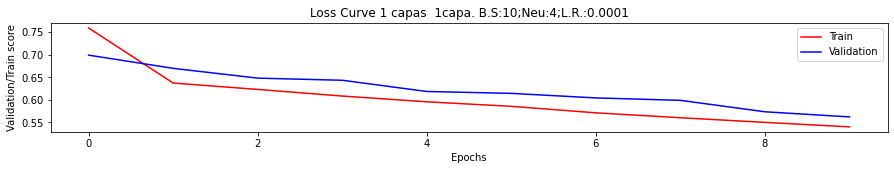

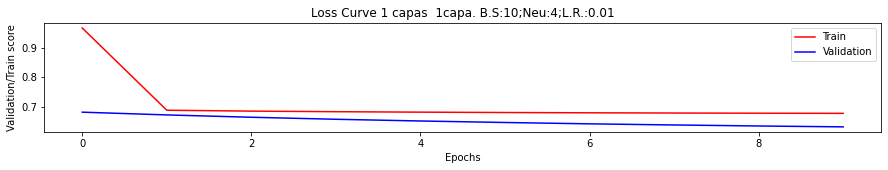

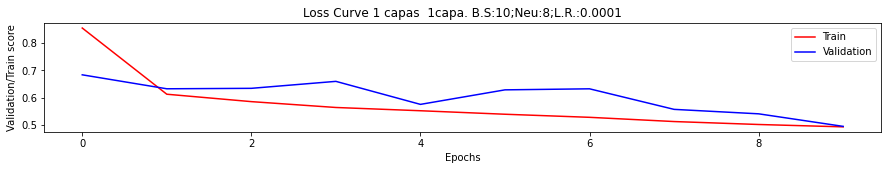

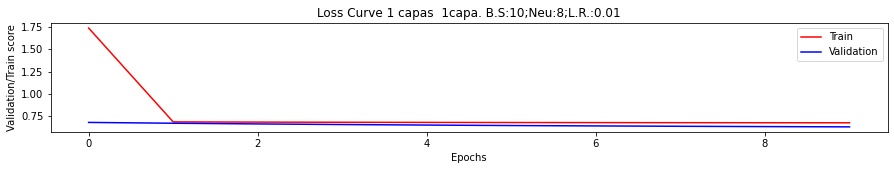

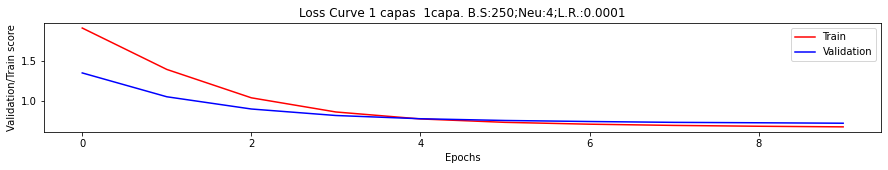

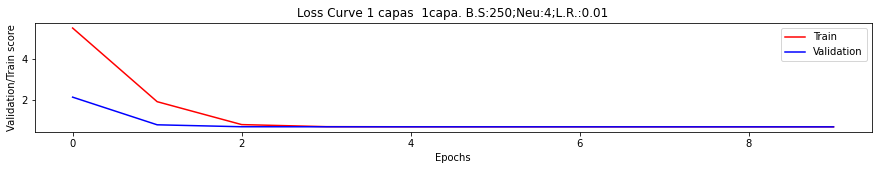

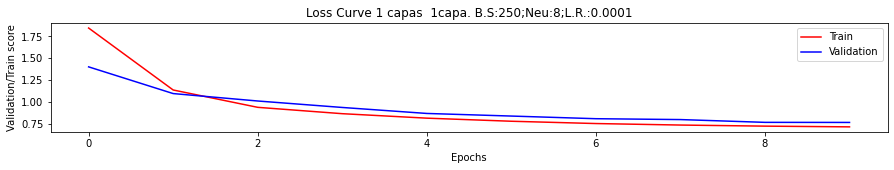

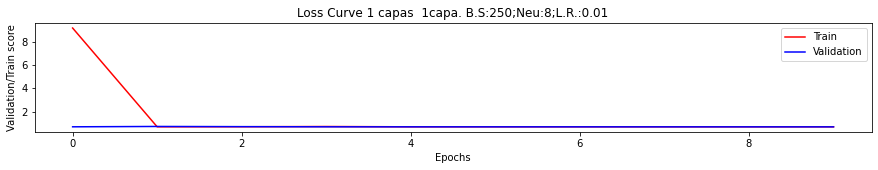

In [668]:
# Creación de curvas de Validation/Train Loss con 1 capa
# Los valores de cada Epoch son los valores promedios de las 10 iteraciones de cada combinación

for i in range(len(largo)):  
    new_pd_train =pd.melt(dt_1[dt_1["combined"]==dt_1["combined"].value_counts().index[i]][["Epoch1_train_loss","Epoch2_train_loss","Epoch3_train_loss", "Epoch4_train_loss","Epoch5_train_loss","Epoch6_train_loss","Epoch7_train_loss","Epoch8_train_loss","Epoch9_train_loss","Epoch10_train_loss"]])
    new_pd_val =pd.melt(dt_1[dt_1["combined"]==dt_1["combined"].value_counts().index[i]][["Epoch1_val_loss","Epoch2_val_loss","Epoch3_val_loss", "Epoch4_val_loss","Epoch5_val_loss","Epoch6_val_loss","Epoch7_val_loss","Epoch8_val_loss","Epoch9_val_loss","Epoch10_val_loss"]])
    new_pd_train =new_pd_train.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_val =new_pd_val.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_train.reset_index(inplace=True)
    new_pd_val.reset_index(inplace=True)
    plt.figure(figsize=(15,2))
    plt.plot(new_pd_train["Mean Value"], 'r', label = "Train")
    plt.plot(new_pd_val["Mean Value"], 'b', label = "Validation")
    plt.legend(loc="upper right")
    plt.xlabel('Epochs')
    plt.ylabel('Validation/Train score')
    #plt.suptitle("Loss Curve 1 capas")
    plt.title("Loss Curve 1 capas  "+largo_1[i])
    
    plt.show()

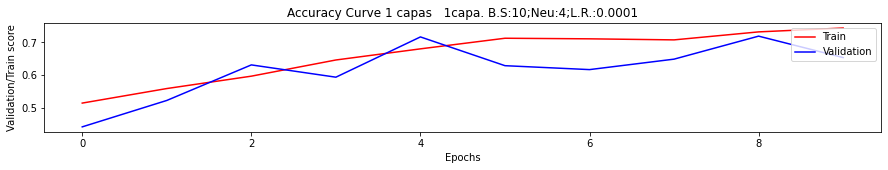

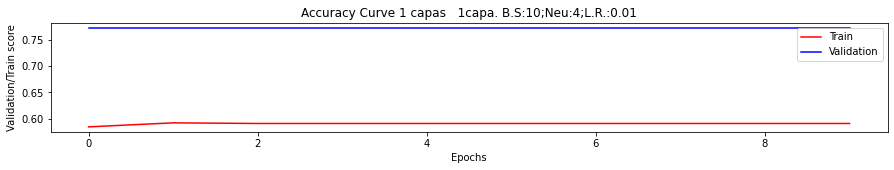

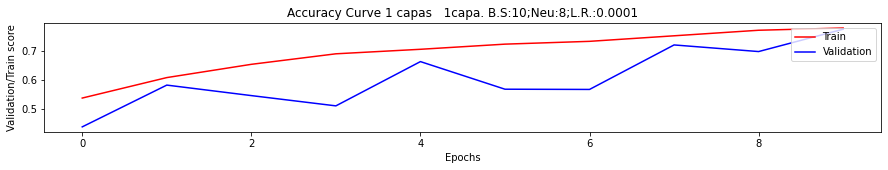

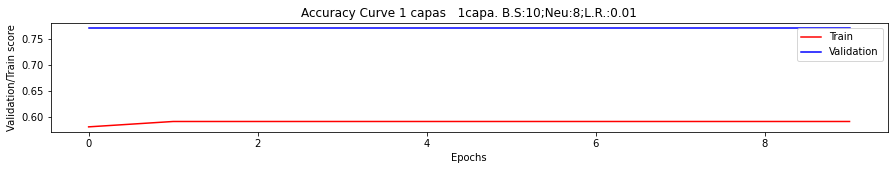

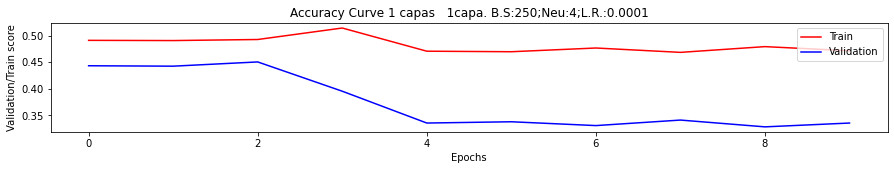

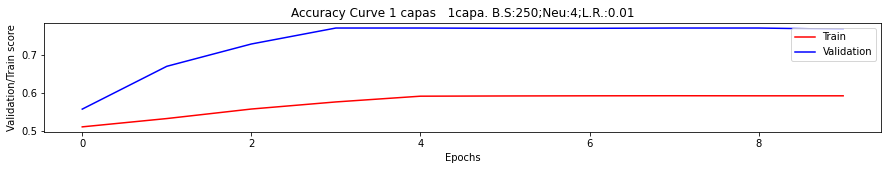

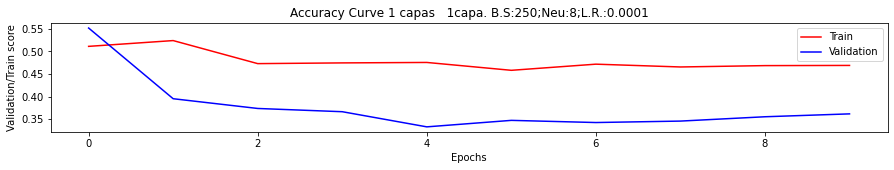

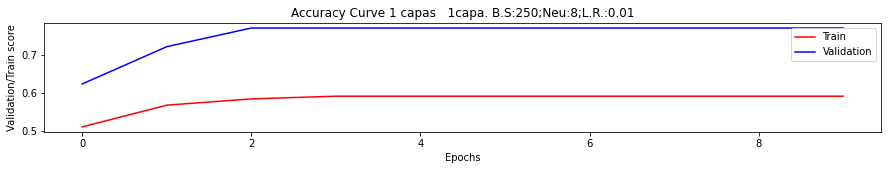

In [657]:
# Creación de curvas de Validation/Train Accuracy con 1 capa
# Los valores de cada Epoch son los valores promedios de las 10 iteraciones de cada combinación

for i in range(len(largo)):  
    new_pd_train =pd.melt(dt_1[dt_1["combined"]==dt_1["combined"].value_counts().index[i]][["Epoch1_train_acur","Epoch2_train_acur","Epoch3_train_acur", "Epoch4_train_acur","Epoch5_train_acur","Epoch6_train_acur","Epoch7_train_acur","Epoch8_train_acur","Epoch9_train_acur","Epoch10_train_acur"]])
    new_pd_val =pd.melt(dt_1[dt_1["combined"]==dt_1["combined"].value_counts().index[i]][["Epoch1_val_acur","Epoch2_val_acur","Epoch3_val_acur", "Epoch4_val_acur","Epoch5_val_acur","Epoch6_val_acur","Epoch7_val_acur","Epoch8_val_acur","Epoch9_val_acur","Epoch10_val_acur"]])
    new_pd_train =new_pd_train.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_val =new_pd_val.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_train.reset_index(inplace=True)
    new_pd_val.reset_index(inplace=True)
    plt.figure(figsize=(15,2))
    plt.plot(new_pd_train["Mean Value"], 'r', label = "Train")
    plt.plot(new_pd_val["Mean Value"], 'b', label = "Validation")
    plt.legend(loc="upper right")
    plt.xlabel('Epochs')
    plt.ylabel('Validation/Train score')
    #plt.suptitle("Accuracy Curve 1 capas")
    plt.title("Accuracy Curve 1 capas   "+largo_1[i])
    plt.show()

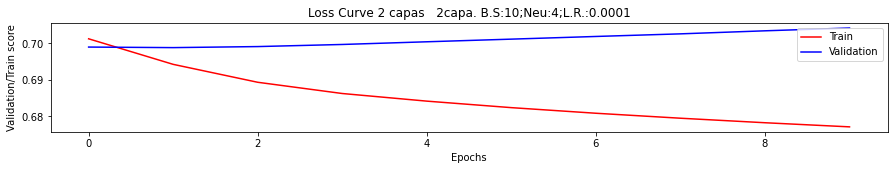

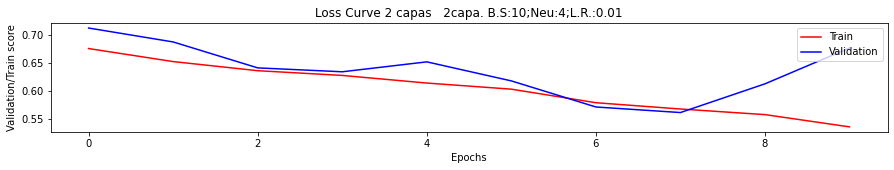

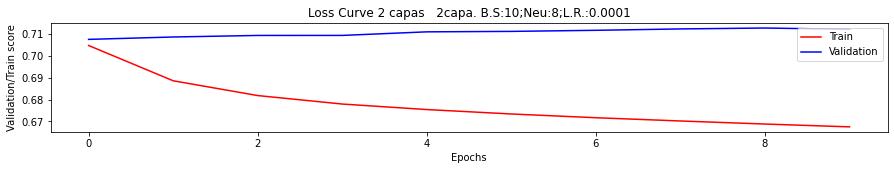

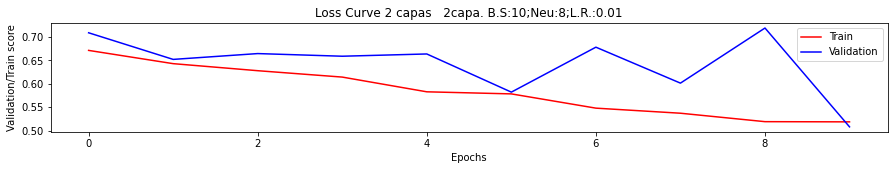

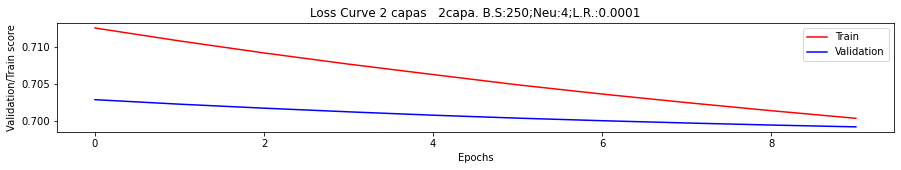

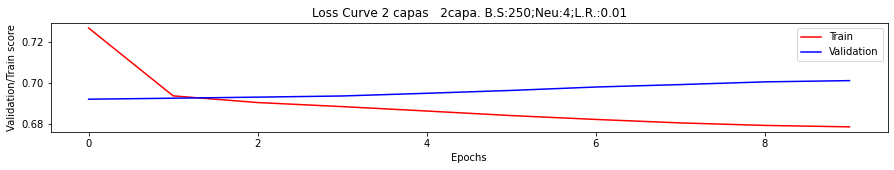

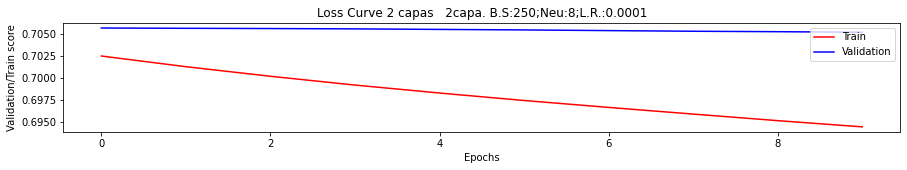

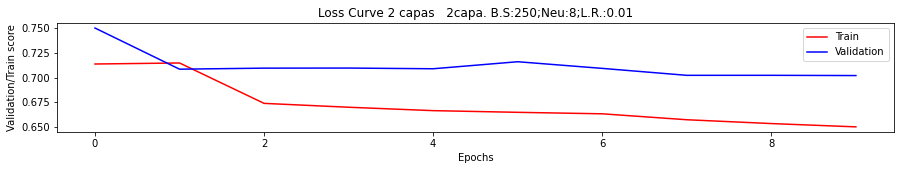

In [658]:
# Creación de curvas de Validation/Train Loss con 2 capa
# Los valores de cada Epoch son los valores promedios de las 10 iteraciones de cada combinación

for i in range(len(largo)):  
    new_pd_train =pd.melt(dt_2[dt_2["combined"]==dt_2["combined"].value_counts().index[i]][["Epoch1_train_loss","Epoch2_train_loss","Epoch3_train_loss", "Epoch4_train_loss","Epoch5_train_loss","Epoch6_train_loss","Epoch7_train_loss","Epoch8_train_loss","Epoch9_train_loss","Epoch10_train_loss"]])
    new_pd_val =pd.melt(dt_2[dt_2["combined"]==dt_2["combined"].value_counts().index[i]][["Epoch1_val_loss","Epoch2_val_loss","Epoch3_val_loss", "Epoch4_val_loss","Epoch5_val_loss","Epoch6_val_loss","Epoch7_val_loss","Epoch8_val_loss","Epoch9_val_loss","Epoch10_val_loss"]])
    new_pd_train =new_pd_train.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_val =new_pd_val.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_train.reset_index(inplace=True)
    new_pd_val.reset_index(inplace=True)
    plt.figure(figsize=(15,2))
    plt.plot(new_pd_train["Mean Value"], 'r', label="Train")
    plt.plot(new_pd_val["Mean Value"], 'b', label = "Validation")
    plt.legend(loc="upper right")
    plt.xlabel('Epochs')
    plt.ylabel('Validation/Train score')
    #plt.suptitle("Loss Curve 2 capas")
    plt.title("Loss Curve 2 capas   "+largo_2[i])
    plt.show()

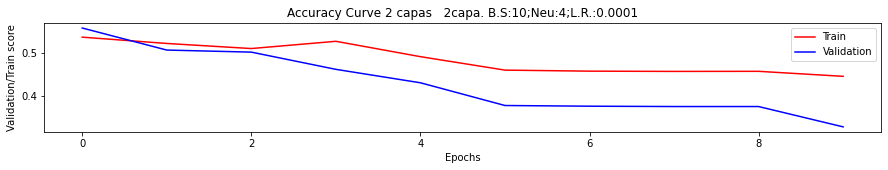

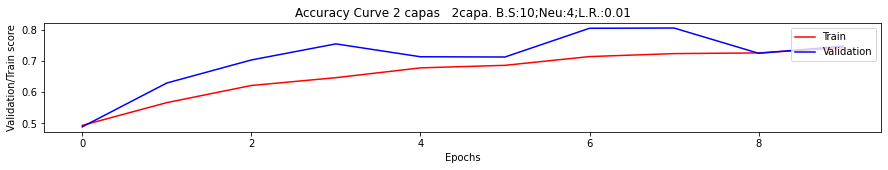

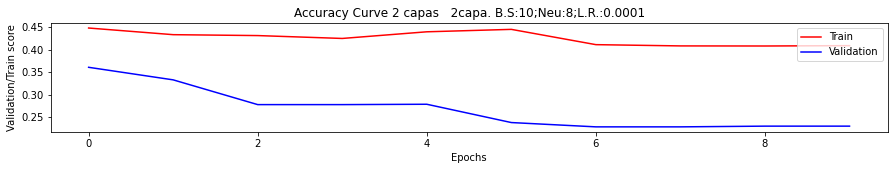

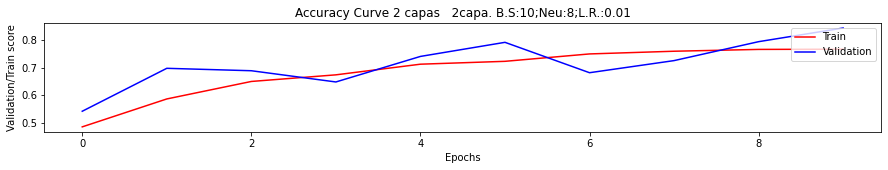

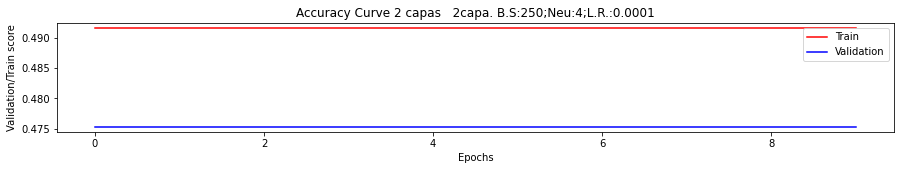

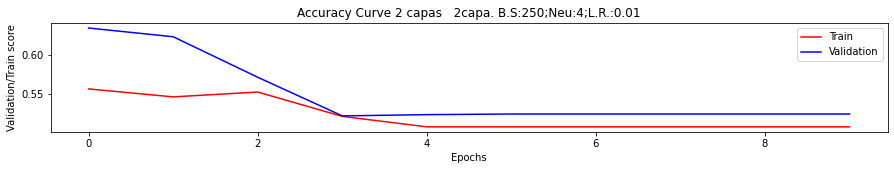

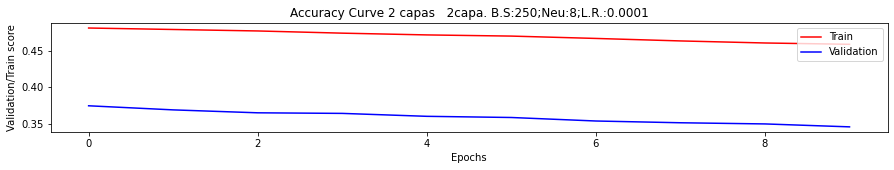

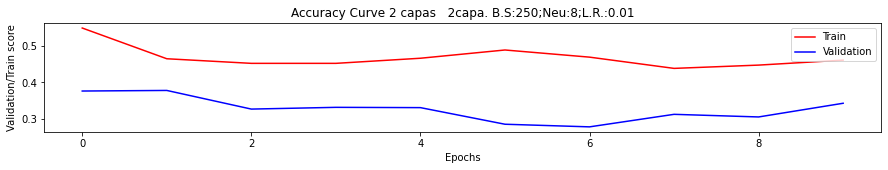

In [659]:
# Creación de curvas de Validation/Train Accuracy con 2 capa
# Los valores de cada Epoch son los valores promedios de las 10 iteraciones de cada combinación

for i in range(len(largo)):  
    new_pd_train =pd.melt(dt_2[dt_2["combined"]==dt_2["combined"].value_counts().index[i]][["Epoch1_train_acur","Epoch2_train_acur","Epoch3_train_acur", "Epoch4_train_acur","Epoch5_train_acur","Epoch6_train_acur","Epoch7_train_acur","Epoch8_train_acur","Epoch9_train_acur","Epoch10_train_acur"]])
    new_pd_val =pd.melt(dt_2[dt_2["combined"]==dt_2["combined"].value_counts().index[i]][["Epoch1_val_acur","Epoch2_val_acur","Epoch3_val_acur", "Epoch4_val_acur","Epoch5_val_acur","Epoch6_val_acur","Epoch7_val_acur","Epoch8_val_acur","Epoch9_val_acur","Epoch10_val_acur"]])
    new_pd_train =new_pd_train.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_val =new_pd_val.groupby("variable",sort=False)["value"].agg([('Min Value' , 'min'), ('Max Value', 'max'),('Mean Value', 'mean')])
    new_pd_train.reset_index(inplace=True)
    new_pd_val.reset_index(inplace=True)
    plt.figure(figsize=(15,2))
    plt.plot(new_pd_train["Mean Value"], 'r', label="Train")
    plt.plot(new_pd_val["Mean Value"], 'b', label = "Validation")
    plt.legend(loc="upper right")
    plt.xlabel('Epochs')
    plt.ylabel('Validation/Train score')
    #plt.suptitle("Accuracy Curve 2 capas")
    plt.title("Accuracy Curve 2 capas   "+largo_2[i])
    plt.show()

In [660]:
dt_lossVal_2 = pd.DataFrame(dt_2[["Epoch1_val_loss","Epoch2_val_loss","Epoch3_val_loss", "Epoch4_val_loss","Epoch5_val_loss","Epoch6_val_loss","Epoch7_val_loss","Epoch8_val_loss","Epoch9_val_loss","Epoch10_val_loss","combined"]].groupby("combined",sort=False).agg([('Min Loss Value' , 'min')]).T.min(), columns=["Min Loss Val"])
dt_lossTra_2 = pd.DataFrame(dt_2[["Epoch1_train_loss","Epoch2_train_loss","Epoch3_train_loss", "Epoch4_train_loss","Epoch5_train_loss","Epoch6_train_loss","Epoch7_train_loss","Epoch8_train_loss","Epoch9_train_loss","Epoch10_train_loss","combined"]].groupby("combined",sort=False).agg([('Min Loss Value' , 'min')]).T.min(), columns=["Min Loss Train"])
dt_accuTra_2 = pd.DataFrame(dt_2[["Epoch1_train_acur","Epoch2_train_acur","Epoch3_train_acur", "Epoch4_train_acur","Epoch5_train_acur","Epoch6_train_acur","Epoch7_train_acur","Epoch8_train_acur","Epoch9_train_acur","Epoch10_train_acur","combined"]].groupby("combined",sort=False).agg([('Max Accu Value' , 'max')]).T.max(), columns=["Max Accu Train"])
dt_accuVal_2 = pd.DataFrame(dt_2[["Epoch1_val_acur","Epoch2_val_acur","Epoch3_val_acur", "Epoch4_val_acur","Epoch5_val_acur","Epoch6_val_acur","Epoch7_val_acur","Epoch8_val_acur","Epoch9_val_acur","Epoch10_val_acur","combined"]].groupby("combined",sort=False).agg([('Max Accu Value' , 'max')]).T.max(), columns=["Max Accu Val"])
dt_meanAccuVal_2 = pd.DataFrame(dt_2[["Epoch1_val_acur","Epoch2_val_acur","Epoch3_val_acur", "Epoch4_val_acur","Epoch5_val_acur","Epoch6_val_acur","Epoch7_val_acur","Epoch8_val_acur","Epoch9_val_acur","Epoch10_val_acur","combined"]].groupby("combined",sort=False).agg([('Mean Accu Value' , 'mean')]).T.mean(), columns=["Mean Accu Val"])
dt_meanAccuTra_2 = pd.DataFrame(dt_2[["Epoch1_train_acur","Epoch2_train_acur","Epoch3_train_acur", "Epoch4_train_acur","Epoch5_train_acur","Epoch6_train_acur","Epoch7_train_acur","Epoch8_train_acur","Epoch9_train_acur","Epoch10_train_acur","combined"]].groupby("combined",sort=False).agg([('Mean Accu Value' , 'mean')]).T.mean(), columns=["Mean Accu Train"])
dt_meanLossVal_2 = pd.DataFrame(dt_2[["Epoch1_val_loss","Epoch2_val_loss","Epoch3_val_loss", "Epoch4_val_loss","Epoch5_val_loss","Epoch6_val_loss","Epoch7_val_loss","Epoch8_val_loss","Epoch9_val_loss","Epoch10_val_loss","combined"]].groupby("combined",sort=False).agg([('Mean Loss Value' , 'mean')]).T.mean(), columns=["Mean Loss Val"])
dt_meanLossTra_2 = pd.DataFrame(dt_2[["Epoch1_train_loss","Epoch2_train_loss","Epoch3_train_loss", "Epoch4_train_loss","Epoch5_train_loss","Epoch6_train_loss","Epoch7_train_loss","Epoch8_train_loss","Epoch9_train_loss","Epoch10_train_loss","combined"]].groupby("combined",sort=False).agg([('Mean Loss Value' , 'mean')]).T.mean(), columns=["Mean Loss Train"])

dt_lossVal_2["Min Loss Train"]=dt_lossTra_2["Min Loss Train"]
dt_lossVal_2["Max Accu Train"]=dt_accuTra_2["Max Accu Train"]
dt_lossVal_2["Max Accu Val"]=dt_accuVal_2["Max Accu Val"]
dt_lossVal_2["Mean Accu Val"]=dt_meanAccuVal_2["Mean Accu Val"]
dt_lossVal_2["Mean Accu Train"]=dt_meanAccuTra_2["Mean Accu Train"]
dt_lossVal_2["Mean Loss Val"]=dt_meanLossVal_2["Mean Loss Val"]
dt_lossVal_2["Mean Loss Train"]=dt_meanLossTra_2["Mean Loss Train"]

dt_lossVal_1 = pd.DataFrame(dt_1[["Epoch1_val_loss","Epoch2_val_loss","Epoch3_val_loss", "Epoch4_val_loss","Epoch5_val_loss","Epoch6_val_loss","Epoch7_val_loss","Epoch8_val_loss","Epoch9_val_loss","Epoch10_val_loss","combined"]].groupby("combined",sort=False).agg([('Min Loss Value' , 'min')]).T.min(), columns=["Min Loss Val"])
dt_lossTra_1 = pd.DataFrame(dt_1[["Epoch1_train_loss","Epoch2_train_loss","Epoch3_train_loss", "Epoch4_train_loss","Epoch5_train_loss","Epoch6_train_loss","Epoch7_train_loss","Epoch8_train_loss","Epoch9_train_loss","Epoch10_train_loss","combined"]].groupby("combined",sort=False).agg([('Min Loss Value' , 'min')]).T.min(), columns=["Min Loss Train"])
dt_accuTra_1 = pd.DataFrame(dt_1[["Epoch1_train_acur","Epoch2_train_acur","Epoch3_train_acur", "Epoch4_train_acur","Epoch5_train_acur","Epoch6_train_acur","Epoch7_train_acur","Epoch8_train_acur","Epoch9_train_acur","Epoch10_train_acur","combined"]].groupby("combined",sort=False).agg([('Max Accu Value' , 'max')]).T.max(), columns=["Max Accu Train"])
dt_accuVal_1 = pd.DataFrame(dt_1[["Epoch1_val_acur","Epoch2_val_acur","Epoch3_val_acur", "Epoch4_val_acur","Epoch5_val_acur","Epoch6_val_acur","Epoch7_val_acur","Epoch8_val_acur","Epoch9_val_acur","Epoch10_val_acur","combined"]].groupby("combined",sort=False).agg([('Max Accu Value' , 'max')]).T.max(), columns=["Max Accu Val"])
dt_meanAccuVal_1 = pd.DataFrame(dt_1[["Epoch1_val_acur","Epoch2_val_acur","Epoch3_val_acur", "Epoch4_val_acur","Epoch5_val_acur","Epoch6_val_acur","Epoch7_val_acur","Epoch8_val_acur","Epoch9_val_acur","Epoch10_val_acur","combined"]].groupby("combined",sort=False).agg([('Mean Accu Value' , 'mean')]).T.mean(), columns=["Mean Accu Val"])
dt_meanAccuTra_1 = pd.DataFrame(dt_1[["Epoch1_train_acur","Epoch2_train_acur","Epoch3_train_acur", "Epoch4_train_acur","Epoch5_train_acur","Epoch6_train_acur","Epoch7_train_acur","Epoch8_train_acur","Epoch9_train_acur","Epoch10_train_acur","combined"]].groupby("combined",sort=False).agg([('Mean Accu Value' , 'mean')]).T.mean(), columns=["Mean Accu Train"])
dt_meanLossVal_1 = pd.DataFrame(dt_1[["Epoch1_val_loss","Epoch2_val_loss","Epoch3_val_loss", "Epoch4_val_loss","Epoch5_val_loss","Epoch6_val_loss","Epoch7_val_loss","Epoch8_val_loss","Epoch9_val_loss","Epoch10_val_loss","combined"]].groupby("combined",sort=False).agg([('Mean Loss Value' , 'mean')]).T.mean(), columns=["Mean Loss Val"])
dt_meanLossTra_1 = pd.DataFrame(dt_1[["Epoch1_train_loss","Epoch2_train_loss","Epoch3_train_loss", "Epoch4_train_loss","Epoch5_train_loss","Epoch6_train_loss","Epoch7_train_loss","Epoch8_train_loss","Epoch9_train_loss","Epoch10_train_loss","combined"]].groupby("combined",sort=False).agg([('Mean Loss Value' , 'mean')]).T.mean(), columns=["Mean Loss Train"])

dt_lossVal_1["Min Loss Train"]=dt_lossTra_1["Min Loss Train"]
dt_lossVal_1["Max Accu Train"]=dt_accuTra_1["Max Accu Train"]
dt_lossVal_1["Max Accu Val"]=dt_accuVal_1["Max Accu Val"]
dt_lossVal_1["Mean Accu Val"]=dt_meanAccuVal_1["Mean Accu Val"]
dt_lossVal_1["Mean Accu Train"]=dt_meanAccuTra_1["Mean Accu Train"]
dt_lossVal_1["Mean Loss Val"]=dt_meanLossVal_1["Mean Loss Val"]
dt_lossVal_1["Mean Loss Train"]=dt_meanLossTra_1["Mean Loss Train"]

In [661]:
dt_lossVal_2

,Min Loss Val,Min Loss Train,Max Accu Train,Max Accu Val,Mean Accu Val,Mean Accu Train,Mean Loss Val,Mean Loss Train
combined,,,,,,,,
2capa. B.S:10;Neu:4;L.R.:0.0001,0.686906,0.641956,0.810989,0.798246,0.429984,0.487073,0.701052,0.685363
2capa. B.S:10;Neu:4;L.R.:0.01,0.356012,0.426615,0.848352,0.947368,0.709490,0.660519,0.636863,0.604919
2capa. B.S:10;Neu:8;L.R.:0.0001,0.680682,0.640540,0.808791,0.842105,0.268740,0.426354,0.710666,0.678052
2capa. B.S:10;Neu:8;L.R.:0.01,0.400553,0.398852,0.890110,0.938596,0.715550,0.687532,0.643747,0.584033
2capa. B.S:250;Neu:4;L.R.:0.0001,0.681446,0.659315,0.591209,0.771930,0.475279,0.491708,0.700780,0.705898
2capa. B.S:250;Neu:4;L.R.:0.01,0.671613,0.656256,0.720879,0.771930,0.550000,0.522777,0.696152,0.689071
2capa. B.S:250;Neu:8;L.R.:0.0001,0.676158,0.661520,0.806593,0.771930,0.359490,0.469950,0.705431,0.698108
2capa. B.S:250;Neu:8;L.R.:0.01,0.635947,0.595211,0.898901,0.938596,0.326874,0.468851,0.711775,0.672854


In [662]:
dt_lossVal_2["ysupAccuTrain"]=dt_lossVal_2["Max Accu Train"]- dt_lossVal_2["Mean Accu Train"]
dt_lossVal_2["ysupAccuVal"]=dt_lossVal_2["Max Accu Val"]- dt_lossVal_2["Mean Accu Val"]
dt_lossVal_2["yinfLossVal"]=-dt_lossVal_2["Min Loss Val"]+ dt_lossVal_2["Mean Loss Val"]
dt_lossVal_2["yinfLossTrain"]=-dt_lossVal_2["Min Loss Train"]+ dt_lossVal_2["Mean Loss Train"]

dt_lossVal_1["ysupAccuTrain"]=dt_lossVal_1["Max Accu Train"]- dt_lossVal_1["Mean Accu Train"]
dt_lossVal_1["ysupAccuVal"]=dt_lossVal_1["Max Accu Val"]- dt_lossVal_1["Mean Accu Val"]
dt_lossVal_1["yinfLossVal"]=-dt_lossVal_1["Min Loss Val"]+ dt_lossVal_1["Mean Loss Val"]
dt_lossVal_1["yinfLossTrain"]=-dt_lossVal_1["Min Loss Train"]+ dt_lossVal_1["Mean Loss Train"]

In [663]:
dt_comb=pd.concat([dt_lossVal_2,dt_lossVal_1], axis=0)

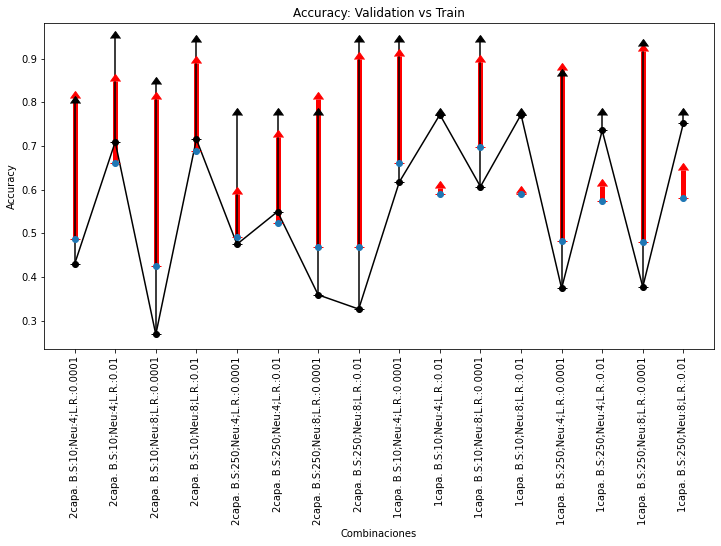

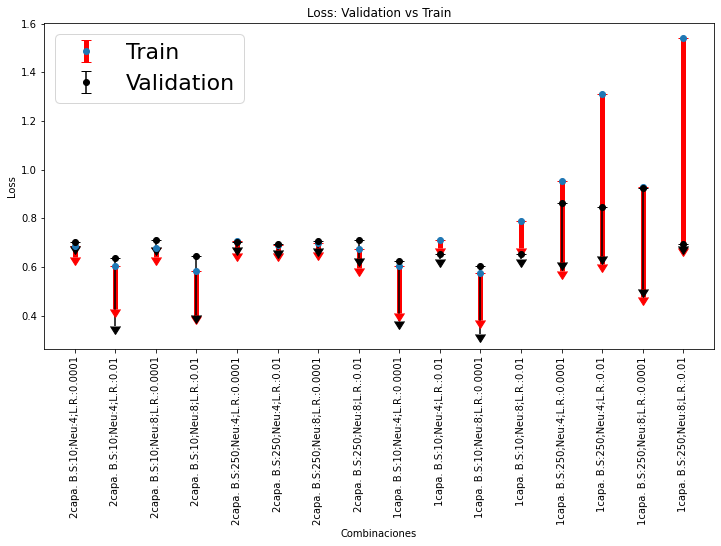

In [667]:
x_Acurr = dt_comb[["ysupAccuTrain","ysupAccuVal"]].reset_index(drop=False)["combined"].values
error_Accur_train = dt_comb[["ysupAccuTrain","ysupAccuVal"]].reset_index(drop=False)["ysupAccuTrain"].values
error_Accur_Val = dt_comb[["ysupAccuTrain","ysupAccuVal"]].reset_index(drop=False)["ysupAccuVal"].values
y_Accur_train = dt_comb[["Mean Accu Train"]].reset_index(drop=False)["Mean Accu Train"].values
y_Accur_Val = dt_comb[["Mean Accu Val"]].reset_index(drop=False)["Mean Accu Val"].values

error_Accur_train = [np.zeros(8*2),error_Accur_train ]
error_Accur_Val = [np.zeros(8*2),error_Accur_Val ]

plt.figure(figsize=(12,6))
plt.plot(x_Acurr, y_Accur_Val, "black")
plt.errorbar(x_Acurr, y_Accur_train, yerr=error_Accur_train, fmt = "o", ecolor="red", elinewidth=5, label="Train",capsize=5, barsabove=False, lolims=True)
plt.errorbar(x_Acurr, y_Accur_Val, yerr=error_Accur_Val, fmt = "o", color="black", label="Validation",capsize=5, barsabove=False, lolims=True)
plt.xticks(rotation=90)
#plt.legend(loc="lower right", prop={'size': 22})
plt.xlabel('Combinaciones')
plt.ylabel('Accuracy')
#plt.suptitle("Accuracy Curve 2 capas")
plt.title("Accuracy: Validation vs Train")
plt.show()


x_Loss = dt_comb[["yinfLossTrain","yinfLossVal"]].reset_index(drop=False)["combined"].values
error_Loss_train = dt_comb[["yinfLossTrain","yinfLossVal"]].reset_index(drop=False)["yinfLossTrain"].values
error_Loss_Val = dt_comb[["yinfLossTrain","yinfLossVal"]].reset_index(drop=False)["yinfLossVal"].values
y_Loss_train = dt_comb[["Mean Loss Train"]].reset_index(drop=False)["Mean Loss Train"].values
y_Loss_Val = dt_comb[["Mean Loss Val"]].reset_index(drop=False)["Mean Loss Val"].values

error_Loss_train = [error_Loss_train, np.zeros(8*2), ]
error_Loss_Val = [error_Loss_Val, np.zeros(8*2)]

plt.figure(figsize=(12,6))
plt.errorbar(x_Loss, y_Loss_train, yerr=error_Loss_train, fmt = "o", ecolor="red", elinewidth=5, label="Train",capsize=5, barsabove=False, uplims=True)
plt.errorbar(x_Loss, y_Loss_Val, yerr=error_Loss_Val, fmt = "o", color="black", label="Validation", capsize=5, barsabove=False, uplims=True)
plt.xticks(rotation=90)
plt.legend(loc="best", prop={'size': 22})
plt.xlabel('Combinaciones')
plt.ylabel('Loss')
#plt.suptitle("Accuracy Curve 2 capas")
plt.title("Loss: Validation vs Train")
plt.show()


In [665]:
dt_comb.to_excel('Combinaciones_Deep_Learning.xlsx', sheet_name='Data')